# Weather Data Manipulation-0

Historical weather data is a key element of your model. In this notebook, we introduce old data from the snow farming project in Craftsbury. The first data deals with temperature signals from the Craftsbury snow-farming experiment. First we study mulch insulation, for which we have 4 temperature probes, at the surface of the snow, 10 cm within the mulch , on top of the insulation material and 46 cm above the pile.

## Loading up data

We begin with importing the module needed for this study. The module `pandas` allows all kinds of manipulations of excel spreadsheets and files, including reading, writing, creating or deleting columns or rows, performing statistics, plotting, etc...

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd


The data is contained in spreadsheets located in the folder `Insulation`. The pandas function to read a `.xslx` file is `read_excel` which requires the location and name of the file. All other arguments are optional. If there are multiple sheets and you want to read a sheet other than the first one, you must specify the name of the spreadsheed. The description of the columns in the second row or row 1 for python. In the first instruction `header=1` tells pandas to create column after the information read at that row and collect data in subsequent rows. The instruction `data_parser=[1]` makes sure that the timestamp is stored at the right format. Finally `names=["..","..",".."]` renames the columns to names of your choice.

 There are four columns, sample number, timestamp, probe 1 and probe 2. `pandas` works to its full potential when you define the `index` column for your data. Here the index column is the timestamp colum, the sample number column does not add any value to our study and therefore is dropped.

In [3]:


sensor811 = pd.read_excel("Insulation/SN 20103811 2018-07-16 13_18_09 -0400.xlsx",sheet_name="DATA",
                          header=1,date_parser=[1],names=["#","timestamp","30cm","0cm"])
sensor811 = sensor811.set_index('timestamp')
sensor811 = sensor811.drop("#",axis=1)
sensor934 = pd.read_excel("Insulation/SN 20366934 2018-07-16 13_19_37 -0400.xlsx",sheet_name="DATA",
                          header=1,date_parser=[0],names=["#","timestamp","10cm","46cm"])
sensor934 = sensor934.set_index('timestamp')
sensor934 = sensor934.drop("#",axis=1)

Here is what one of the objects looks like:

In [4]:
sensor934

,10cm,46cm
timestamp,,
2018-06-24 11:53:16,17.457685,17.200283
2018-06-24 11:58:16,17.543486,17.414785
2018-06-24 12:03:16,17.672188,16.857080
2018-06-24 12:08:16,18.186993,17.500586
2018-06-24 12:13:16,18.787598,17.543486
...,...,...
2018-07-16 12:58:16,11.580332,38.221474
2018-07-16 13:03:16,11.666133,36.376759
2018-07-16 13:08:16,11.709033,41.396103


## Plotting data in pandas

The following cell shows how to (line) plot with pandas. `ax=` defines the graph in which data should be plotted (here `ax0`). In the absence of this optional argument, pandas will produce 4 individual plots. If you do not specify which column to plot, all columns contained in the object are included in the plot.   

<Figure size 288x144 with 0 Axes>

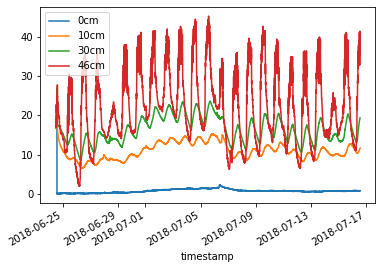

In [5]:
plt.figure(figsize=(4,2))
ax0 = sensor811.plot(y="0cm")
sensor934.plot(y="10cm", ax = ax0)
sensor811.plot(y="30cm", ax = ax0)
sensor934.plot(y="46cm", ax = ax0)
plt.show()

## Data manipulation
On top of reading and plotting excel spreadsheets (or any data arrange as a `DataFrame` the `pandas` class of data), `pandas` has many data manipulation functionalities. It can remove blanks or fill blanks with a default value, which is useful when the sensor misbehaved and skip a sample or two. A useful feature for time series is to perform running averages, for instance, here we average the data over 1 day with a rolling average and resampling. **Look up both definitions**

<AxesSubplot:xlabel='timestamp'>

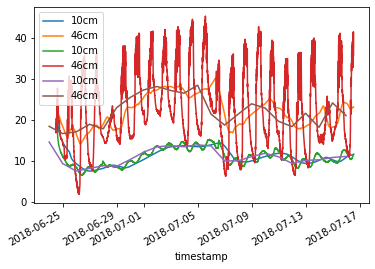

In [58]:
sensor934_rolling = sensor934.rolling('1D').mean()
sensor934_resample = sensor934.resample('1D').mean()
ax0 = sensor934_rolling.plot()
sensor934.plot(ax=ax0)
sensor934_resample.plot(ax=ax0)

## Power spectrum

Consider a signal of duration $0\leq t\leq t_m$ with $N$ samples $T_i$, $i\in[0,N-1]$. The sampling time step is $\Delta t=t_m/N$ and the sampling frequency is 
$$
f_s=\frac{N}{t_m}=\frac{1}{\Delta t}
$$
The energy of this signal , whatever the variable producing the signal may be, is defined as

$$
E=\frac{1}{t_m}\sum_0^{N-1}\vert T_i\vert^2\Delta t
$$

A power spectrum for the data of interest decompose the information of temperature as a function of time, into the influence of each frequency on the energy of the signal. It assumes that the signal can be represented by a Fourier series (see the section of Fourier below), or
$$
T(t)=\frac{a_0}{2}+\sum_{n=1}^{N-1}\hat{T}_n\exp \left(\hat{\jmath}\frac{2\pi n}{t_m}t\right) =\frac{a_0}{2}+ \sum_{n=1}^{N-1}\hat{T}_n\exp(\hat{\jmath}2\pi f_n t)
$$
where $f_n$ is the nth frequency, $\hat{\jmath}^2=-1$ and the complex Fourier coefficient is  
$$
\hat{T}_n=\frac{2}{t_m}\int_0^{t_m}T(t)\exp(-\hat{\jmath}2\pi f_n t)\, dt
$$

The Parseval theorem demonstrates that 
$$
\frac{1}{t_m}\sum_{n=0}^{N-1}\vert T_n\vert^2\Delta t=\sum_{n=0}^{N-1}\vert \hat{T}_n\vert^2\Delta f
$$
using the orthogonality of base functions $b_n=\exp(\hat{\jmath}2\pi f_n t)$ (i.e., $\int b_nb_m df$ is 1 if $n=m$ and 0 otherwise). The power spectrum gives the contribution of each frequency to the energy of the signal
$$
P(n)= \vert\hat{T}_n\vert
$$

The following cell computes the power spectra of the four temperature signals using the `scipy.signal.periodogram` function, which returns the range of frequencies resolved by the signal and the value of the power spectrum for each resolved frequency.

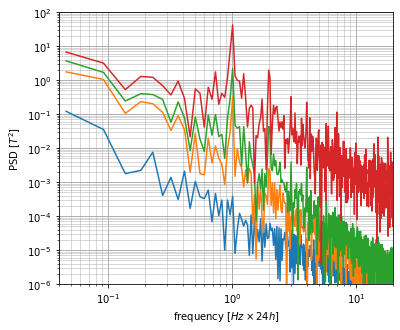

In [59]:
alt0 = np.copy(sensor811["0cm"])
alt30 = np.copy(sensor811["30cm"])
alt10 = np.copy(sensor934["10cm"])
alt46 = np.copy(sensor934["46cm"])
from scipy import signal
Ts = 5*60
freqs = 1/Ts

f,P0 = signal.periodogram(x=alt0[100:],fs=freqs, scaling='spectrum' )
f,P30 = signal.periodogram(x=alt30[100:],fs=freqs, scaling='spectrum' )
f1,P10 = signal.periodogram(x=alt10[100:],fs=freqs, scaling='spectrum' )
f1,P46 = signal.periodogram(x=alt46[100:],fs=freqs, scaling='spectrum' )
plt.figure(figsize=(6,5))
plt.loglog(f[1:]*24*3600,P0[1:])
plt.loglog(f1[1:]*24*3600,P10[1:])
plt.loglog(f[1:]*24*3600,P30[1:])
plt.loglog(f1[1:]*24*3600,P46[1:])
plt.xlabel(r'frequency [$Hz\times24h$]')
plt.ylabel(r'PSD [$T^2$]')
plt.ylim(1e-6,1e2)
plt.xlim(4e-2,2e1)
plt.grid(True, which = "major", lw = 1)
plt.grid(True, which = "minor", lw = 0.5)
plt.minorticks_on()
plt.show()

To help reading this graph, the frequency is normalized the frequency of one day. For the 46cm probes, the highest contribution comes from the frequency corresponding to one day period. Interestingly, the harmonics, frequencies corresponding to $1/2$, $1/3$, $1/4$ and $1/7$ day period, or 2,3,4,7 times the main frequency also stand out. The latter may be just a fluke of the data. The main frequency and its second harmonics are large contributors for all but the temperature signal on the snow. It shows that diurnal oscillations are damped by wood chips, in other words, the snow does not "feel" the oscillations of ambient temperatures.

We now repeat the process for construction insulation (foam board).

<Figure size 288x216 with 0 Axes>

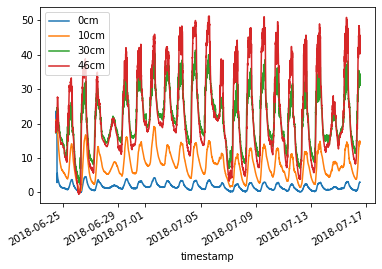

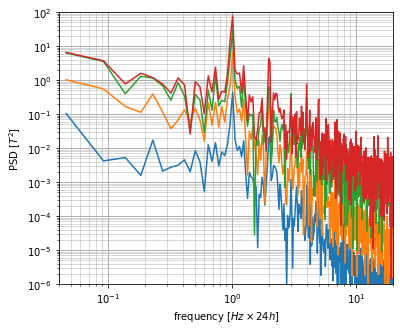

In [33]:
sensor929 = pd.read_excel("Insulation/SN 20366929 2018-07-16 13_18_44 -0400.xlsx",sheet_name="DATA",
                          header=1,date_parser=[1],names=["#","timestamp","0cm","10cm"])
sensor929 = sensor929.set_index('timestamp')
sensor929 = sensor929.drop("#",axis=1)
sensor930 = pd.read_excel("Insulation/SN 20366930 2018-07-16 13_19_12 -0400.xlsx",sheet_name="DATA",
                          header=1,date_parser=[0],names=["#","timestamp","30cm","46cm"])
sensor930 = sensor930.set_index('timestamp')
sensor930 = sensor930.drop("#",axis=1)
plt.figure(figsize=(4,3))
ax = sensor929.plot(y="0cm")
sensor929.plot(y="10cm", ax = ax)
sensor930.plot(y="30cm", ax = ax)
sensor930.plot(y="46cm", ax = ax)
plt.show()
alt0 = np.copy(sensor929["0cm"])
alt10 = np.copy(sensor929["10cm"])
alt30 = np.copy(sensor930["30cm"])
alt46 = np.copy(sensor930["46cm"])
from scipy import signal
Ts = 5*60
freqs = 1/Ts

ff,Pf0 = signal.periodogram(x=alt0[100:],fs=freqs, scaling='spectrum' )
ff,Pf10 = signal.periodogram(x=alt10[100:],fs=freqs, scaling='spectrum' )
ff1,Pf30 = signal.periodogram(x=alt30[100:],fs=freqs, scaling='spectrum' )
ff1,Pf46 = signal.periodogram(x=alt46[100:],fs=freqs, scaling='spectrum' )
plt.figure(figsize=(6,5))
plt.loglog(ff[1:]*24*3600,Pf0[1:])
plt.loglog(ff[1:]*24*3600,Pf10[1:])
plt.loglog(ff1[1:]*24*3600,Pf30[1:])
plt.loglog(ff1[1:]*24*3600,Pf46[1:])
plt.xlabel(r'frequency [$Hz\times24h$]')
plt.ylabel(r'PSD [$T^2$]')
plt.ylim(1e-6,1e2)
plt.xlim(4e-2,2e1)
plt.grid(True, which = "major", lw = 1)
plt.grid(True, which = "minor", lw = 0.5)
plt.minorticks_on()
plt.show()

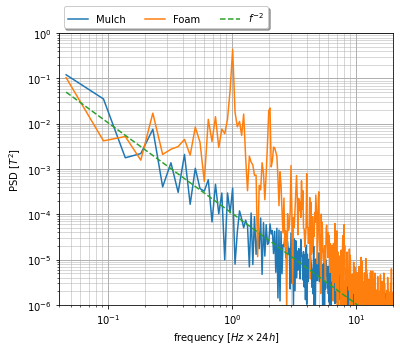

In [35]:
plt.figure(figsize=(6,5))
plt.loglog(f[1:]*24*3600,P0[1:],label="Mulch")
plt.loglog(ff[1:]*24*3600,Pf0[1:],label="Foam")
plt.loglog(f[1:]*24*3600,0.05*((f[1:]/f[1]))**(-2),'--',label=r"$f^{-2}$")
plt.xlabel(r'frequency [$Hz\times24h$]')
plt.ylabel(r'PSD [$T^2$]')
plt.ylim(1e-6,1e0)
plt.xlim(4e-2,2e1)
plt.grid(True, which = "major", lw = 1)
plt.grid(True, which = "minor", lw = 0.5)
plt.minorticks_on()
plt.legend(loc=3, bbox_to_anchor=[0, 1],
          ncol=3, shadow=True, fancybox=True)
plt.show()

All three plots show the clear difference between inorganic insulation and wood chips: The diurnal fluctuations of temperature penetrate throughout the foam. The graph above demonstrates that the contribution to the energy of the temperature fluctuations of the (1/24h) frequency is nearly 4 orders of magnitude higher and its harmonics 3 orders for the foam compared to the wood chips.

Also shown on the graph is a line showing that the contribution to the energy of the temperature signal decreases as a power law $f^{-2}$. This power law decay is indicative of a certain dynamics that is beyond the scope of this course.

<h1>Discrete Fourier Series</h1>

Consider a function $f$ periodic over a domain $0\leq x\leq 2\pi$, discretized by $N_x$ points. The longest wavelength wave that can be contained in the domain is $L_x$. A phyiscal understanding of Fourier series is the representation of a system as the sum of many waves fo wavelengths smaller or equal to $L_x$. In a discrete sense, the series of wave used to decompose the system is defined as:
$$
a_n\exp\left(\hat{\jmath}\frac{2\pi n}{Lx}\right)
$$
such that
<p class='alert alert-danger'>
$$
f(x) = \sum_{n=-\infty}^{\infty}a_n\exp\left(\hat{\jmath}\frac{2\pi nx}{Lx}\right)
$$
</p>
and 
<p class='alert alert-danger'>
$$
a_n = \frac{1}{L_x}\int_Lf(x)\exp\left(-\hat{\jmath}\frac{2\pi nx}{Lx}\right)dx
$$
</p>
Here $\hat{\jmath}^2=-1$.Often the reduction to wavenumber is used, where
<p class='alert alert-danger'>
$$
k_n = \frac{2\pi n}{L_x}
$$
</p>
Note that if $x$ is time instead of distance, $L_x$ is a time $T$ and the smallest frequency contained in the domain is $f_0=1/T_0$ and the wavenumber $n$ is $k_n=2\pi f_0n=2\pi f_n$ with $f_n$ for $\vert n\vert >1$ are the higher frequencies. 

<h1>Discrete Fourier Transform (DFT)</h1>

In scientific computing we are interested in applying Fourier series on vectors or matrices, containing a integer number of samples. The DFT is the fourier series for the number of samples. DFT functions available in python or any other language only care about the number of samples, therefore the wavenumber is 
<p class='alert alert-danger'>
$$
k_n=\frac{2\pi n}{N_x}
$$
</p>
Consider a function $f$ periodic over a domain $0\leq x\leq 2\pi$, discretized by $N_x$ points. The nodal value is $f_i$ located at $x_i=(i+1)\Delta x$ with $\Delta x=L_x/Nx$. The DFT is defined as
<p class='alert alert-danger'>
$$
\hat{f}_k=\sum_{i=0}^{N_x-1}f_i\exp\left(-2\pi\hat{\jmath}\frac{ik}{N_x}\right)
$$
</p>
The inverse DFT is defined as
<p class='alert alert-danger'>
$$
f_i=\sum_{k=0}^{N_x-1}\hat{f}_k\exp\left(2\pi\hat{\jmath}\frac{ik}{N_x}\right)
$$
</p>

<h1>Fast Fourier Transform (FFT)</h1>
Using symmetries, the FFT reduces computational costs and stores in the following way:
<p class='alert alert-danger'>
$$
\hat{f}_k=\sum_{i=-Nx/2+1}^{N_x/2}f_i\exp\left(-2\pi\hat{\jmath}\frac{ik}{N_x}\right)
$$
</p>
<p class='alert alert-info'>
Compared to the Fourier series, DFT or FFT assumes that the system can be accurately captured by a finite number of waves. It is up to the user to ensure that the number of computational points is sufficient to capture the smallest scale, or smallest wavelength or highest frequence. Remember that the function on which FT is applied must be periodic over the domain and the grid spacing must be uniform.
</p>
There are FT algorithms for unevenly space data, but this is beyond the scope of this notebook.


<h1>Filtering</h1>

The following provides examples of low- and high-pass filters based on Fourier transform. A ideal low-(high-) pass filter passes frequencies that are lower than a threshold without attenuation and removes frequencies that are higher than the threshold. 

When applied to spatial data (function of $x$ rather than $t$-time), the FT (Fourier Transform) of a variable is function of wavenumbers
$$
k_n=\frac{2\pi n}{L_x}
$$
or wavelengths
$$
\lambda_n=\frac{2\pi}{k_n}
$$

The test function is defined as sum of $N_{wave}$ cosine function:
$$
u(x)=\sum_{n=0}^{N_{wave}}A_n\cos\left(nx+\phi_n\right)
$$
with the following first and second derivatives:
$$
\frac{du}{dx}=\sum_{n=1}^{N_{wave}}-nA_n\sin\left(nx+\phi_n\right)
$$
$$
\frac{d^2u}{dx^2}=\sum_{n=1}^{N_{wave}}-n^2A_n\cos\left(nx+\phi_n\right)
$$
The python code for function u and its derivatives is written below. Here amplitudes $A_n$ and phases $\phi_n$ are chosen randomly of ranges $[0,1]$ and $[0,2\pi]$, respectively.

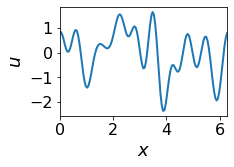

In [60]:
font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 18,
        }
import matplotlib.pyplot as plt
import numpy as np

Lx = 2.*np.pi
Nx = 128
u = np.zeros(Nx,dtype='float64')
du = np.zeros(Nx,dtype='float64')
ddu = np.zeros(Nx,dtype='float64')
k_0 = 2.*np.pi/Lx 
x = np.linspace(Lx/Nx,Lx,Nx)
Nwave = 12
uwave = np.zeros((Nx,Nwave),dtype='float64')
duwave = np.zeros((Nx,Nwave),dtype='float64')
dduwave = np.zeros((Nx,Nwave),dtype='float64')
ampwave = np.random.normal(0.,0.5,Nwave)
# ampwave = np.random.random(Nwave)
phasewave = np.random.random(Nwave)*2*np.pi
for iwave in range(Nwave):
    uwave[:,iwave] = ampwave[iwave]*np.cos(k_0*iwave*x+phasewave[iwave])
#     duwave[:,iwave] = -k_0*iwave*ampwave[iwave]*np.sin(k_0*iwave*x+phasewave[iwave])
#     dduwave[:,iwave] = -(k_0*iwave)**2*ampwave[iwave]*np.cos(k_0*iwave*x+phasewave[iwave])
u = np.sum(uwave,axis=1)
# du = np.sum(duwave,axis=1)
# ddu = np.sum(dduwave,axis=1)
#print(u)
plt.figure(figsize=(3,2))
plt.plot(x,u,lw=2)
plt.xlim(0,Lx)
#plt.legend(loc=3, bbox_to_anchor=[0, 1],
#           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$x$', fontdict = font)
plt.ylabel('$u$', fontdict = font)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()


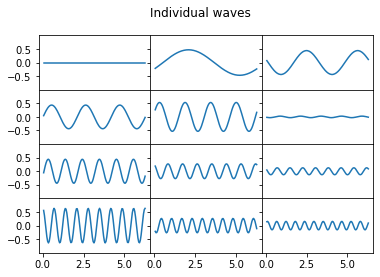

In [61]:
fig, axs = plt.subplots(4, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.suptitle('Individual waves')
n = 0
for i in range(4):
    for j in range(3):
        axs[i,j].plot(x,uwave[:,n])
        n += 1
        axs[i,j].set_ylim(-1,1)
        axs[i,j].set_yticks([-0.5, 0., 0.5])
for ax in axs.flat:
    ax.label_outer()

Imagine that we want to filter **all** waves with wavenumbers lower or higher than the 6th wavenumber. First we apply the Fourier transform $\hat{u}$ to the signal and define our wavenumber $k$

In [38]:
uhat = np.fft.rfft(u)
k = np.fft.rfftfreq(Nx,d=Lx/Nx)
k

array([ 0.        ,  0.15915494,  0.31830989,  0.47746483,  0.63661977,
        0.79577472,  0.95492966,  1.1140846 ,  1.27323954,  1.43239449,
        1.59154943,  1.75070437,  1.90985932,  2.06901426,  2.2281692 ,
        2.38732415,  2.54647909,  2.70563403,  2.86478898,  3.02394392,
        3.18309886,  3.3422538 ,  3.50140875,  3.66056369,  3.81971863,
        3.97887358,  4.13802852,  4.29718346,  4.45633841,  4.61549335,
        4.77464829,  4.93380324,  5.09295818,  5.25211312,  5.41126807,
        5.57042301,  5.72957795,  5.88873289,  6.04788784,  6.20704278,
        6.36619772,  6.52535267,  6.68450761,  6.84366255,  7.0028175 ,
        7.16197244,  7.32112738,  7.48028233,  7.63943727,  7.79859221,
        7.95774715,  8.1169021 ,  8.27605704,  8.43521198,  8.59436693,
        8.75352187,  8.91267681,  9.07183176,  9.2309867 ,  9.39014164,
        9.54929659,  9.70845153,  9.86760647, 10.02676141, 10.18591636])

### Low pass filter
The low pass filter consists of setting all coefficients with wavenumbers larger than 6 to zero, followed by an inverse Fourier transform

In [39]:
kcut = k[6]
mask = np.where(k >= kcut)

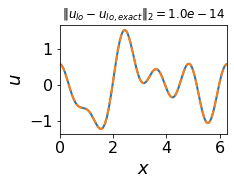

In [40]:
nkcut = 6
kcut = k[nkcut]
mask = np.where(k >= kcut)
uhatlo = np.copy(uhat)
uhatlo[mask] = (0.0 + 0.0j)
ulo = np.real(np.fft.irfft(uhatlo))
uloexact = np.sum(uwave[:,:nkcut],axis = 1)
plt.figure(figsize=(3,2))
plt.plot(x,ulo,lw=2)
plt.plot(x,uloexact,'--',lw=2)
plt.xlim(0,Lx)
#plt.legend(loc=3, bbox_to_anchor=[0, 1],
#           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$x$', fontdict = font)
plt.ylabel('$u$', fontdict = font)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title(r"$\Vert u_{lo}-u_{lo,exact}\Vert_2=%1.1e$"%(np.linalg.norm(ulo-uloexact)))
plt.show()

In [41]:
uhat[:12]

array([ -4.56530076 +0.j        , -27.7194943  +5.36620105j,
        20.23367691+18.05768482j,  23.33544117-27.95812804j,
         1.49831614 -6.95013365j,  20.63736325+22.23392048j,
        32.72523872+10.41710937j,   1.91712732+23.79595287j,
       -10.48357404+19.06973697j, -10.95552359+27.48782398j,
        26.94936249+22.83368851j,  -9.55157414+10.62320356j])

In [42]:
""" 
The low pass filter nullify all Fourier coefficients 
beyond the 6th coefficient
"""
uhatlo[:12]

array([ -4.56530076 +0.j        , -27.7194943  +5.36620105j,
        20.23367691+18.05768482j,  23.33544117-27.95812804j,
         1.49831614 -6.95013365j,  20.63736325+22.23392048j,
         0.         +0.j        ,   0.         +0.j        ,
         0.         +0.j        ,   0.         +0.j        ,
         0.         +0.j        ,   0.         +0.j        ])

### High pass filters
Perfect high-pass filters eliminate Fourier terms with wavenumbers lower that the cutoff wavenumber $k_{cut}$

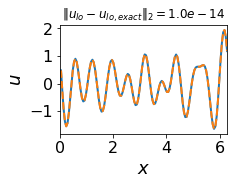

In [43]:
nkcut = 6
kcut = k[nkcut]
mask = np.where(k < kcut)
uhathi = np.copy(uhat)
uhathi[mask] = (0.0 + 0.0j)
uhi = np.real(np.fft.irfft(uhathi))
uhiexact = np.sum(uwave[:,nkcut:],axis = 1)
plt.figure(figsize=(3,2))
plt.plot(x,uhi,lw=2)
plt.plot(x,uhiexact,'--',lw=2)
plt.xlim(0,Lx)
#plt.legend(loc=3, bbox_to_anchor=[0, 1],
#           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$x$', fontdict = font)
plt.ylabel('$u$', fontdict = font)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title(r"$\Vert u_{lo}-u_{lo,exact}\Vert_2=%1.1e$"%(np.linalg.norm(ulo-uloexact)))
plt.show()

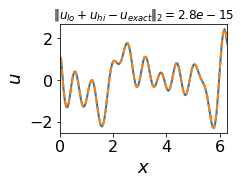

In [44]:
plt.figure(figsize=(3,2))
plt.plot(x,u,lw=2)
plt.plot(x,uhi+ulo,'--',lw=2)
plt.xlim(0,Lx)
#plt.legend(loc=3, bbox_to_anchor=[0, 1],
#           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$x$', fontdict = font)
plt.ylabel('$u$', fontdict = font)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title(r"$\Vert u_{lo}+u_{hi}-u_{exact}\Vert_2=%1.1e$"%(np.linalg.norm(ulo+uhi-u)))
plt.show()

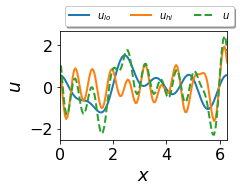

In [45]:
plt.figure(figsize=(3,2))
plt.plot(x,ulo,lw=2,label="$u_{lo}$")
plt.plot(x,uhi,lw=2,label="$u_{hi}$")
plt.plot(x,u,'--',lw=2,label="$u$")
plt.xlim(0,Lx)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
          ncol=3, shadow=True, fancybox=True)
plt.xlabel('$x$', fontdict = font)
plt.ylabel('$u$', fontdict = font)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

In [46]:
P = uhat*np.conj(uhat)
P

array([2.08419711e+01+0.j, 7.97166478e+02+0.j, 7.35481662e+02+0.j,
       1.32619974e+03+0.j, 5.05493090e+01+0.j, 9.20247982e+02+0.j,
       1.17945742e+03+0.j, 5.69922750e+02+0.j, 4.73560193e+02+0.j,
       8.75603964e+02+0.j, 1.24764547e+03+0.j, 2.04085022e+02+0.j,
       1.72350308e-27+0.j, 4.95076727e-28+0.j, 3.76621046e-28+0.j,
       1.45967859e-27+0.j, 1.01158343e-27+0.j, 1.06955563e-27+0.j,
       6.43507722e-28+0.j, 2.56678976e-28+0.j, 5.48376761e-28+0.j,
       2.94507562e-28+0.j, 4.24346600e-29+0.j, 9.04743382e-29+0.j,
       2.35273429e-28+0.j, 4.65437237e-28+0.j, 1.12634345e-27+0.j,
       6.86091024e-28+0.j, 9.93064808e-28+0.j, 2.15511512e-28+0.j,
       6.26532572e-28+0.j, 3.70269351e-30+0.j, 2.19549851e-28+0.j,
       1.52886196e-28+0.j, 4.24230154e-28+0.j, 1.12397431e-27+0.j,
       2.83638774e-28+0.j, 7.93812035e-28+0.j, 6.36532290e-29+0.j,
       7.13826090e-29+0.j, 9.14096910e-28+0.j, 2.02406732e-27+0.j,
       1.08760859e-27+0.j, 7.35946582e-29+0.j, 9.49516336e-29+

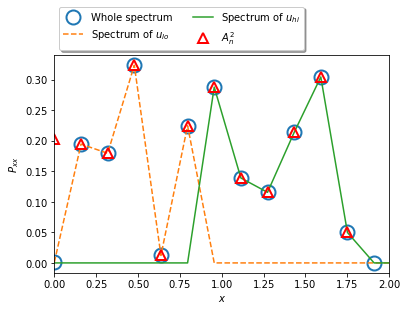

In [51]:
nP = 2*(Lx/Nx)**2/Lx/np.pi
P = np.real(uhat*np.conj(uhat))
Plo = np.real(uhatlo*np.conj(uhatlo))
Phi = np.real(uhathi*np.conj(uhathi))
P[:] *= nP
P[0] /= 4
Plo[:] *= nP
Plo[0] /= 4
Phi[:] *= nP
Phi[0] /= 4
plt.plot(k,P,'o',label="Whole spectrum",ms=14, markerfacecolor="None",
         markeredgecolor='C0', markeredgewidth=2)
plt.plot(k,Plo,'--',label="Spectrum of $u_{lo}$")
plt.plot(k,Phi,'-',label="Spectrum of $u_{hi}$")
plt.plot(k[:12],ampwave[:]**2,'^',label="$A_n^2$",ms=10, markerfacecolor="None",
         markeredgecolor='red', markeredgewidth=2)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
          ncol=2, shadow=True, fancybox=True)
plt.xlim(0,2)
plt.xlabel(r"$x$")
plt.ylabel(r"$P_{xx}$")
plt.show()

The last 2 graphs show the comparison between the low-pass, high-pass filtered signals and the orginal signals as well as the power spectrum of all signals for the first 12 frequencies.